# russian-news-2020

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("vfomenko/russian-news-2020")

# print("Path to dataset files:", path)

In [ ]:
import re
import pandas as pd

df = pd.read_csv("./data/russian-news-2020/news.csv")
df["text"] = df["text"].apply(lambda x: re.sub(r'\s+', ' ', x).replace(" ,", ",").replace(" .", ".").strip())
df = df[["source", "text", "publication_date"]]  # .sample(5000)
df

,source,text,publication_date
0,lenta.ru,В 1930-е годы Советский Союз охватила лихорадк...,2020-08-30T00:01:00+03:00
1,lenta.ru,Олимпийская чемпионка по фигурному катанию Али...,2020-08-31T20:04:00+03:00
2,lenta.ru,Российский врач-диетолог Римма Мойсенко объясн...,2020-08-31T20:07:00+03:00
3,lenta.ru,В 2019 году телеканал «Ю» запустил адаптацию з...,2020-08-30T00:04:00+03:00
4,lenta.ru,Актер Михаил Ефремов систематически употреблял...,2020-08-31T18:27:00+03:00
...,...,...,...
21668,tjournal.ru,Россия прекратила поставки нефти на белорусски...,1578056674
21669,tjournal.ru,Светодиодную конструкцию не хотели убирать из-...,1577866951
21670,tjournal.ru,Власти направили военные корабли и авиацию для...,1577864124
21671,tjournal.ru,"С каждым годом количество горожан, выбирающих ...",1577894168


In [2]:
from datetime import datetime
import dateutil.parser
import re

RU_MONTHS = {
    'января': '01', 'февраля': '02', 'марта': '03', 'апреля': '04',
    'мая': '05', 'июня': '06', 'июля': '07', 'августа': '08',
    'сентября': '09', 'октября': '10', 'ноября': '11', 'декабря': '12',
}

def normalize_date(value: str) -> str:
    value = value.strip()

    # --- 1) ДД.ММ.ГГГГ внутри строки ---
    m = re.search(r'(\d{2})\.(\d{2})\.(\d{4})', value)
    if m:
        day, month, year = m.groups()
        return datetime(int(year), int(month), int(day)).date()  # f"{y}-{mth}-{d}"

    # --- 2) Русские даты внутри строки ---
    # Пример: "18:03, 31 августа 2020"
    m = re.search(r'(\d{1,2})\s+(\w+)\s+(\d{4})', value)
    if m and m.group(2).lower() in RU_MONTHS:
        day, month_word, year = m.groups()
        month = RU_MONTHS[month_word.lower()]
        return datetime(int(year), int(month), int(day)).date()  # f"{year}-{month}-{day.zfill(2)}"

    # --- 3) Unix timestamp ---
    if value.isdigit():
        dt = datetime.fromtimestamp(int(value))
        return dt.date()  #.strftime("%Y-%m-%d")

    # --- 4) ISO и любые другие форматы ---
    try:
        dt = dateutil.parser.isoparse(value)
        return dt.date()  #.strftime("%Y-%m-%d")
    except Exception:
        pass

    raise ValueError(f"Не удалось распознать дату: {value}")


df["publication_date"] = df["publication_date"].apply(lambda x: normalize_date(x))
df

,source,text,publication_date
0,lenta.ru,В 1930-е годы Советский Союз охватила лихорадк...,2020-08-30
1,lenta.ru,Олимпийская чемпионка по фигурному катанию Али...,2020-08-31
2,lenta.ru,Российский врач-диетолог Римма Мойсенко объясн...,2020-08-31
3,lenta.ru,В 2019 году телеканал «Ю» запустил адаптацию з...,2020-08-30
4,lenta.ru,Актер Михаил Ефремов систематически употреблял...,2020-08-31
...,...,...,...
21668,tjournal.ru,Россия прекратила поставки нефти на белорусски...,2020-01-03
21669,tjournal.ru,Светодиодную конструкцию не хотели убирать из-...,2020-01-01
21670,tjournal.ru,Власти направили военные корабли и авиацию для...,2020-01-01
21671,tjournal.ru,"С каждым годом количество горожан, выбирающих ...",2020-01-01


In [3]:
df["source"].value_counts()

source
ria.ru         14755
lenta.ru        4510
meduza.io       1538
tjournal.ru      870
Name: count, dtype: int64

### tjournal.ru 

In [4]:
a = set()
for t in df[df["source"] == "tjournal.ru"]["text"]:
    s = set(t.split())
    a = a & s if a else a | s
a

{'Отписаться', 'Подписан', 'Подписаться'}

In [5]:
mask = df["source"] == "tjournal.ru"
df.loc[mask, "text"] = df[mask]["text"].apply(lambda x: x.split("Подписаться")[0])
df

,source,text,publication_date
0,lenta.ru,В 1930-е годы Советский Союз охватила лихорадк...,2020-08-30
1,lenta.ru,Олимпийская чемпионка по фигурному катанию Али...,2020-08-31
2,lenta.ru,Российский врач-диетолог Римма Мойсенко объясн...,2020-08-31
3,lenta.ru,В 2019 году телеканал «Ю» запустил адаптацию з...,2020-08-30
4,lenta.ru,Актер Михаил Ефремов систематически употреблял...,2020-08-31
...,...,...,...
21668,tjournal.ru,Россия прекратила поставки нефти на белорусски...,2020-01-03
21669,tjournal.ru,Светодиодную конструкцию не хотели убирать из-...,2020-01-01
21670,tjournal.ru,Власти направили военные корабли и авиацию для...,2020-01-01
21671,tjournal.ru,"С каждым годом количество горожан, выбирающих ...",2020-01-01


### lenta.ru - аномалий не нашел

In [6]:
df[df["source"] == "lenta.ru"].sample(10)["text"].values

array(['«Агробизнес», выступающий в Первой лиге чемпионата Украины, расторг контракт с нападающим Игорем Сикорским из-за того, что он провел отпуск в России. Об этом сообщается на сайте клуба. 31-летний футболист лишился работы после того, как опубликовал в своем Instagram фото из Санкт-Петербурга. Это действие было расценено руководством как нанесение ущерба имиджу клуба. В заявлении «Агробизнеса» утверждается, что поездка Сикорского дискредитировала команду, которая активно поддерживает украинские вооруженные силы. На сайте клуба также приведен скриншот комментариев под постом форварда, где один из пользователей интересуется, выступает ли он за клуб. «Нет, igorsikorskiy, ты за нас больше не играешь», — добавили в заявлении. Сикорский большую часть карьеры провел на Украине. Дольше всего он выступал за клуб «Сталь» из Алчевска (131 матч в период с 2010 по 2014 год). Первым профессиональным клубом в карьере форварда была луганская «Заря». «Агробизнес» занимает шестое место в Первой лиг

### meduza.io - аномалий не нашел

In [7]:
df[df["source"] == "meduza.io"].sample(10)["text"].values

array(['Еще три человека с подтвержденной коронавирусной инфекцией умерли в московских больницах, сообщает оперативный штаб. Все пациенты имели сопутствующие заболевания, в том числе сердечно-сосудистые. Возраст пациентов — от 63 до 72 лет. Таким образом, общее число умерших от СOVID-19 в России выросло до 28 человек. Официально зарегистрированы 2777 случаев заболевания, большая часть из них — в Москве и Подмосковье. По данным оперативного штаба, всего проведено более 536 тысяч тестов на выявление коронавируса.',
       'Я в это верила. Вся избирательная кампания показала огромную поддержку белорусского народа. Огромное количество людей выходили на митинги, такого в нашей Беларуси никогда не было. Было невероятное количество наблюдателей, не все получилось, но мы старались как могли. Отдельно хочу поблагодарить те избирательные комиссии, которые считали честно, это тоже подвиг. Наши люди проснулись. Я очень рада, что они стали активно участвовать в политической жизни. Люди наконец пере

### ria.ru

In [ ]:
mask = df["source"] == "ria.ru"
df[mask].sample(10)["text"].values

array(['МЕХИКО, 20 мар - РИА Новости. Президент Венесуэлы Николас Мадуро сообщил о готовности ООН поддержать правительство республики в борьбе с пандемией коронавируса. По информации правительства Венесуэлы, в стране за сутки зарегистрировано шесть новых случаев заражения коронавирусом, общее число носителей COVID-19 - 42 человека. "Несколько минут назад я получил письмо от ООН, подтверждающее, что система Объединенных Наций готова поддержать правительство Венесуэлы в борьбе с вирусом COVID-19", - сказал он во время выступления, запись которого опубликована в Twitter. По словам Мадуро, страна уже получила из Китая первую партию из 4 тысяч тест-систем, которые позволят сделать 320 тысяч проб, и в течение недели при поддержке КНР, Кубы и Всемирной организации здравоохранения рассчитывает сделать до 2 миллионов тестов. МВФ в среду сообщил, что не может рассмотреть запрос Венесуэлы о выделении стране 5 миллиардов долларов на борьбу с коронавирусом "из-за проблем с признанием властей". Росс

In [ ]:
from string import punctuation, whitespace

skip_alph = whitespace + punctuation
label = "РИА Новости"

def process_ria(s):
    if label in s[:50]:
        city, text = s.split(",", 1)
        date_label, text = text.lstrip(skip_alph).split(".", 1)
        if label in date_label:
            date, maybe_text = date_label.split(label, 1)
            maybe_text = maybe_text.lstrip(skip_alph)
            if len(maybe_text.split()) <= 4:  # упоминание имени и фамилии двух человек
                return text.lstrip(skip_alph)
            else:
                return maybe_text + text
    return s

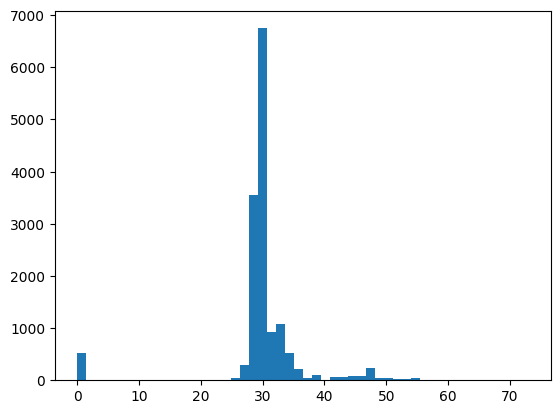

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df[mask]["text"].apply(lambda x: len(x) - len(process_ria(x))), bins=50)
plt.show()

In [12]:
df.loc[mask, "text"] = df[mask]["text"].apply(process_ria)

### Сохранение

In [13]:
import json

with open("./data/russian-news-2020/data.json", "w", encoding="utf-8") as f:
    json.dump(df.astype({"publication_date": str}).to_dict("records"), f, indent=4, ensure_ascii=False)

### Визуализация

In [6]:
import numpy as np

n = len(df)
date_diff = np.zeros((n, n), dtype=float)
dt = [d.timetuple().tm_yday for d in df["publication_date"].values]

for i in range(n):
    for j in range(i + 1, n):
        date_diff[i, j] = abs(dt[i] - dt[j])
date_diff[:5, :5]

array([[  0.,  59., 124.,  56., 167.],
       [  0.,   0.,  65.,   3., 108.],
       [  0.,   0.,   0.,  68.,  43.],
       [  0.,   0.,   0.,   0., 111.],
       [  0.,   0.,   0.,   0.,   0.]])

In [ ]:
import torch
from sentence_transformers import SentenceTransformer
from tqdm import tqdm

def embed_batch(texts, batch_size=16):
    all_embeds = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        emb = model.encode(batch, convert_to_tensor=True, normalize_embeddings=True)
        all_embeds.append(emb.cpu())
        torch.cuda.empty_cache()
    return torch.cat(all_embeds, dim=0)


model = SentenceTransformer("deepvk/USER-bge-m3")
embeddings = embed_batch(df["text"].values)
similarities = model.similarity(embeddings, embeddings) 
print(embeddings.shape)

100%|██████████| 313/313 [06:34<00:00,  1.26s/it]

torch.Size([5000, 1024])


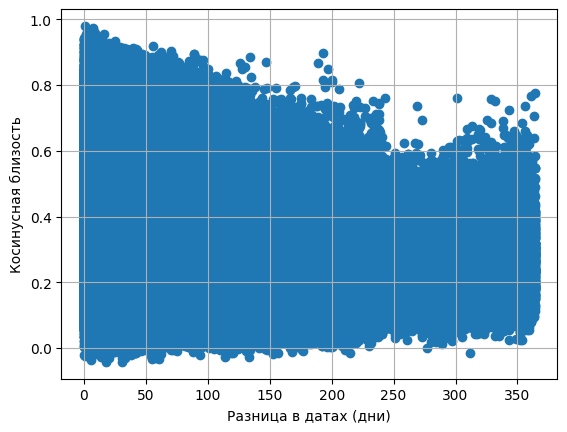

In [ ]:
import matplotlib.pyplot as plt

xs, ys = [], []
for i in range(n):
    for j in range(i + 1, n):   # строго правее диагонали
        xs.append(date_diff[i, j])   # разница дат
        ys.append(similarities[i, j])  # косинусная близость

plt.scatter(xs, ys)
plt.xlabel("Разница в датах (дни)")
plt.ylabel("Косинусная близость")
plt.grid(True)
plt.show()